In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!ls customLambda
!ls

dictionary-lambda100-acc2.pkl  Lambda1-acceleration2.png
dictionary-lambda100-acc4.pkl  Lambda1-acceleration4.png
dictionary-lambda100-acc8.pkl  Lambda1-acceleration8.png
dictionary-lambda10-acc2.pkl   Lambda50-acceleration2.png
dictionary-lambda10-acc4.pkl   Lambda50-acceleration4.png
dictionary-lambda10-acc8.pkl   Lambda50-acceleration8.png
dictionary-lambda1-acc2.pkl    vis-lambda100-acc2.0.pkl
dictionary-lambda1-acc4.pkl    vis-lambda100-acc4.0.pkl
dictionary-lambda1-acc8.pkl    vis-lambda100-acc8.0.pkl
dictionary-lambda50-acc2.pkl   vis-lambda10-acc2.0.pkl
dictionary-lambda50-acc4.pkl   vis-lambda10-acc4.0.pkl
dictionary-lambda50-acc8.pkl   vis-lambda10-acc8.0.pkl
Lambda100-acceleration2.png    vis-lambda1-acc2.0.pkl
Lambda100-acceleration4.png    vis-lambda1-acc4.0.pkl
Lambda100-acceleration8.png    vis-lambda1-acc8.0.pkl
Lambda10-acceleration2.png     vis-lambda50-acc2.0.pkl
Lambda10-acceleration4.png     vis-lambda50-acc4.0.pkl
Lambda10-acceleration8.png     vis-lambda50-acc8.0

In [3]:
#select lambda = 1,10,50,100
#put all files in a folder first, the provide the name to the function
def select_lambda(path_to_files,la = 50):
    #returns 3 lists of vis files for 3 different acceleration factors
    vis2 = list(pd.read_pickle('./{}/vis-lambda{}-acc2.0.pkl'.format(path_to_files,la)))
    vis4 = list(pd.read_pickle('./{}/vis-lambda{}-acc4.0.pkl'.format(path_to_files,la)))
    vis8 = list(pd.read_pickle('./{}/vis-lambda{}-acc8.0.pkl'.format(path_to_files,la)))
    return vis2,vis4,vis8

In [4]:
vis2,vis4,vis8 = select_lambda(path_to_files='customLambda',la=10)

In [5]:
def make_subplots(slice,vis2,vis4,vis8):
    fig, axs = plt.subplots(3,3,sharey=True,figsize=(10,10),sharex=True)
    axs[0,0].imshow(np.abs(vis2[slice][0]),cmap='gray')
    axs[0,0].set_ylabel('50% of Samples')
    axs[0,0].set_title('Ground Truth')
    axs[0,1].imshow(np.abs(vis2[slice][2]),cmap='gray')
    axs[0,1].set_title('Undersampled')
    axs[0,2].imshow(np.abs(vis2[slice][1]),cmap='gray')
    axs[0,2].set_title('Reconstructed')
    axs[1,0].imshow(np.abs(vis4[slice][0]),cmap='gray')
    axs[1,0].set_ylabel('25% of Samples')
    axs[1,1].imshow(np.abs(vis4[slice][2]),cmap='gray')
    axs[1,2].imshow(np.abs(vis4[slice][1]),cmap='gray')
    axs[2,0].imshow(np.abs(vis8[slice][0]),cmap='gray')
    axs[2,0].set_ylabel('12% of Samples')
    axs[2,1].imshow(np.abs(vis8[slice][2]),cmap='gray')
    axs[2,2].imshow(np.abs(vis8[slice][1]),cmap='gray')
    for i in range(0,3):
        for j in range(0,3):
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
    fig.savefig('test.png',bbox_inches='tight')
    plt.tight_layout()
    plt.show()


In [6]:
def subplots_on_steroids(path_to_files,la,slice):
    vis2 = list(pd.read_pickle('./{}/vis-lambda{}-acc2.0.pkl'.format(path_to_files,la)))
    vis4 = list(pd.read_pickle('./{}/vis-lambda{}-acc4.0.pkl'.format(path_to_files,la)))
    vis8 = list(pd.read_pickle('./{}/vis-lambda{}-acc8.0.pkl'.format(path_to_files,la)))
    fig, axs = plt.subplots(3,3,sharey=True,figsize=(10,10),sharex=True)
    axs[0,0].imshow(np.abs(vis2[slice][0]),cmap='gray')
    axs[0,0].set_ylabel('50% of Samples')
    axs[0,0].set_title('Ground Truth')
    axs[0,1].imshow(np.abs(vis2[slice][2]),cmap='gray')
    axs[0,1].set_title('Undersampled')
    axs[0,2].imshow(np.abs(vis2[slice][1]),cmap='gray')
    axs[0,2].set_title('Reconstructed')
    axs[1,0].imshow(np.abs(vis4[slice][0]),cmap='gray')
    axs[1,0].set_ylabel('25% of Samples')
    axs[1,1].imshow(np.abs(vis4[slice][2]),cmap='gray')
    axs[1,2].imshow(np.abs(vis4[slice][1]),cmap='gray')
    axs[2,0].imshow(np.abs(vis8[slice][0]),cmap='gray')
    axs[2,0].set_ylabel('12% of Samples')
    axs[2,1].imshow(np.abs(vis8[slice][2]),cmap='gray')
    axs[2,2].imshow(np.abs(vis8[slice][1]),cmap='gray')
    for i in range(0,3):
        for j in range(0,3):
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
    fig.savefig('fixed-Lamda{}-slice{}'.format(la,str(slice)),bbox_inches='tight')
    plt.tight_layout()
    plt.show()


In [7]:
# for sli in range(0,15):
#     try:
#         subplots_on_steroids('fixedLambda',la=10,slice=sli)
#     except IndexError:
#         print('sli: {} doesnt exist'.format(sli))

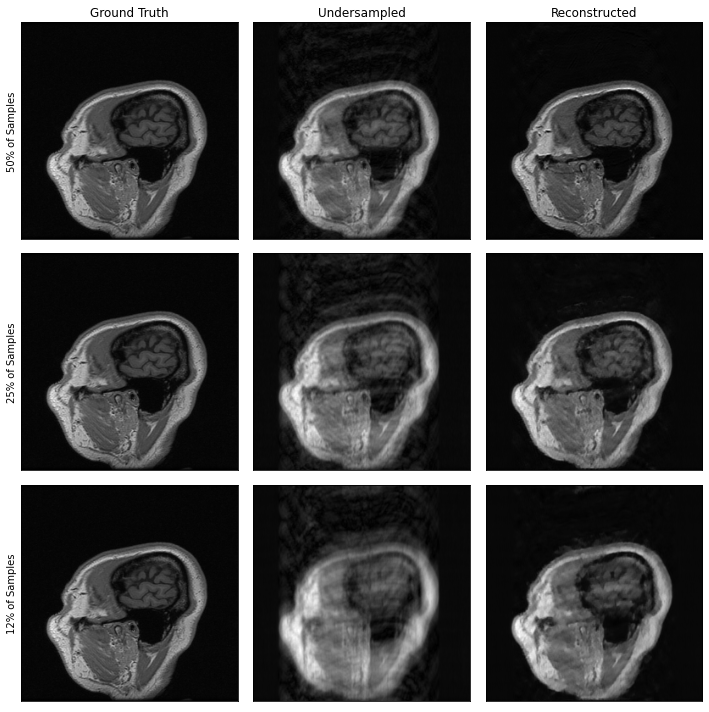

In [8]:
make_subplots(slice=12,vis2=vis2,vis4=vis4,vis8=vis8)


In [27]:
data = {}
name = 'lambda{}-acc{}'
for l in [1,10,50,100]:
    for acc in [2,4,8]:
        data[name.format(l,acc)] = pd.DataFrame(pd.read_pickle('./customLambda/dictionary-lambda{}-acc{}.pkl'.format(l,acc))) 

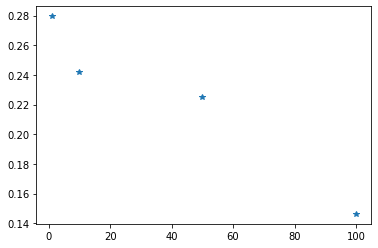

In [10]:
plt.plot([1,10,50,100],[data['lambda1-acc2'].test.unique(),data['lambda10-acc2'].test.unique(),
                        data['lambda50-acc2'].test.unique(),data['lambda100-acc2'].test.unique()],'*')

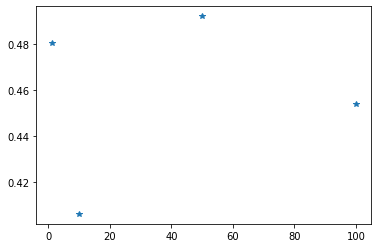

In [11]:
plt.plot([1,10,50,100],[data['lambda1-acc4'].test.unique(),data['lambda10-acc4'].test.unique(),
                        data['lambda50-acc4'].test.unique(),data['lambda100-acc4'].test.unique()],'*')

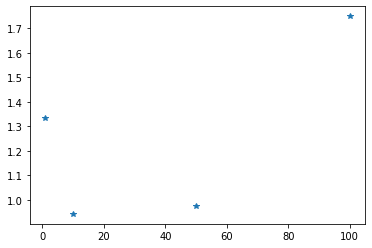

In [12]:
plt.plot([1,10,50,100],[data['lambda1-acc8'].test.unique(),data['lambda10-acc8'].test.unique(),
                        data['lambda50-acc8'].test.unique(),data['lambda100-acc8'].test.unique()],'*')

Text(0.5, 1.0, 'Test MSE vs Undersampling Rate (trainable Lambda)')

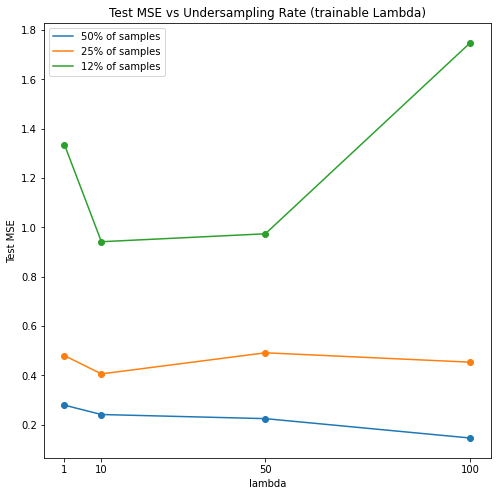

In [13]:
fig,_ = plt.subplots(figsize=(8,8))
plt.plot([1,10,50,100],[data['lambda1-acc2'].test.unique(),data['lambda10-acc2'].test.unique(),
                        data['lambda50-acc2'].test.unique(),data['lambda100-acc2'].test.unique()],label='50% of samples')
plt.plot([1,10,50,100],[data['lambda1-acc4'].test.unique(),data['lambda10-acc4'].test.unique(),
                        data['lambda50-acc4'].test.unique(),data['lambda100-acc4'].test.unique()],label='25% of samples')
plt.plot([1,10,50,100],[data['lambda1-acc8'].test.unique(),data['lambda10-acc8'].test.unique(),
                        data['lambda50-acc8'].test.unique(),data['lambda100-acc8'].test.unique()],label='12% of samples')
plt.scatter([1,10,50,100],[data['lambda1-acc2'].test.unique(),data['lambda10-acc2'].test.unique(),
                        data['lambda50-acc2'].test.unique(),data['lambda100-acc2'].test.unique()])
plt.scatter([1,10,50,100],[data['lambda1-acc4'].test.unique(),data['lambda10-acc4'].test.unique(),
                        data['lambda50-acc4'].test.unique(),data['lambda100-acc4'].test.unique()])
plt.scatter([1,10,50,100],[data['lambda1-acc8'].test.unique(),data['lambda10-acc8'].test.unique(),
                        data['lambda50-acc8'].test.unique(),data['lambda100-acc8'].test.unique()])
plt.xlabel('lambda')
plt.ylabel('Test MSE')
plt.xticks([1,10,50,100])
plt.legend(loc='upper left')
plt.title('Test MSE vs Undersampling Rate (trainable Lambda)')
# plt.savefig('testMSE-lambda.png')

# FIXED LAMBDA

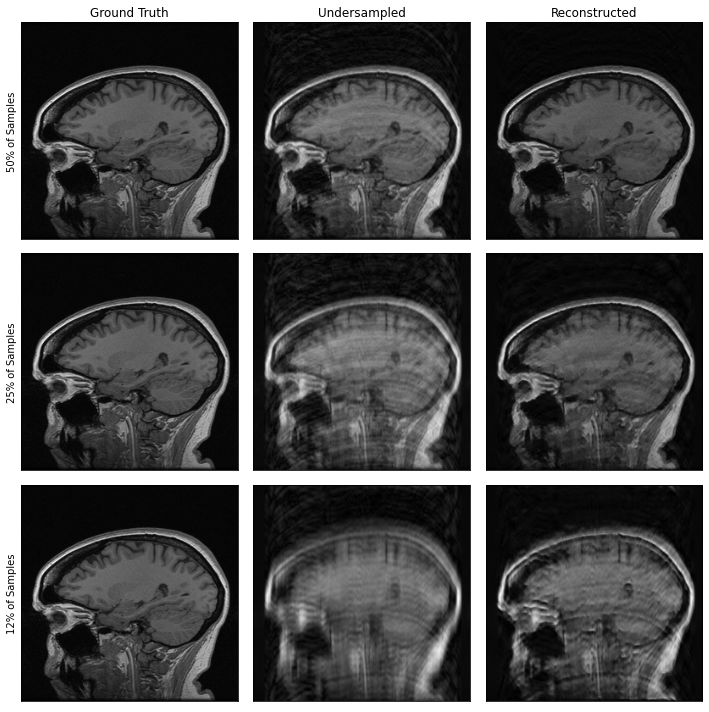

In [14]:
fixedvis2,fixedvis4,fixedvis8 = select_lambda(path_to_files='fixedLambda',la=10)
make_subplots(slice=1,vis2=fixedvis2,vis4=fixedvis4,vis8=fixedvis8)

In [15]:
name = 'lambda{}-acc{}'
fixed_data = {}
trainable_data = {}
l = 10
for acc in [2,4,8]:
    fixed_data[name.format(l,acc)] = pd.DataFrame(pd.read_pickle('./fixedLambda/dictionary-lambda{}-acc{}.pkl'.format(l,acc)))
    trainable_data[name.format(l,acc)] = pd.DataFrame(pd.read_pickle('./customLambda/dictionary-lambda{}-acc{}.pkl'.format(l,acc)))


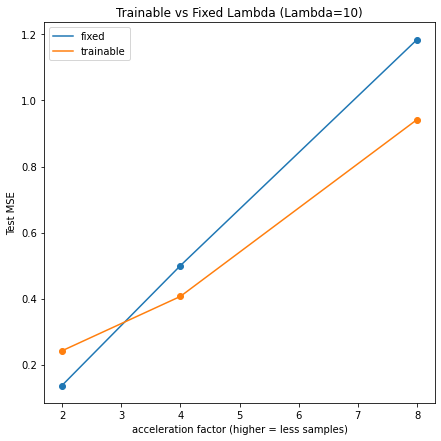

In [16]:
fig,_ = plt.subplots(figsize=(7,7))
plt.plot([2,4,8],[fixed_data['lambda10-acc2'].test.unique(),fixed_data['lambda10-acc4'].test.unique(),fixed_data['lambda10-acc8'].test.unique()],label='fixed')
plt.plot([2,4,8],[trainable_data['lambda10-acc2'].test.unique(),trainable_data['lambda10-acc4'].test.unique(),trainable_data['lambda10-acc8'].test.unique()],label='trainable')
plt.scatter([2,4,8],[fixed_data['lambda10-acc2'].test.unique(),fixed_data['lambda10-acc4'].test.unique(),fixed_data['lambda10-acc8'].test.unique()])
plt.scatter([2,4,8],[trainable_data['lambda10-acc2'].test.unique(),trainable_data['lambda10-acc4'].test.unique(),trainable_data['lambda10-acc8'].test.unique()])
plt.legend()
plt.ylabel('Test MSE')
plt.xlabel('acceleration factor (higher = less samples)')
plt.title('Trainable vs Fixed Lambda (Lambda=10)')
plt.show()
# fig.savefig('trainableVSfixed.png')

# MASKS

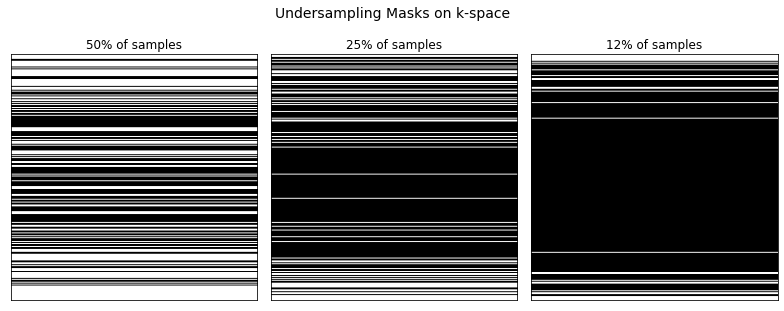

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(11,11))
ax1.imshow(np.abs(vis2[0][3]),cmap='gray')
ax2.imshow(np.abs(vis4[0][3]),cmap='gray')
ax3.imshow(np.abs(vis8[0][3]),cmap='gray')
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax1.set_title('50% of samples')
ax2.set_title('25% of samples')
ax3.set_title('12% of samples')
fig.suptitle("Undersampling Masks on k-space", fontsize=14,y=0.7)
plt.tight_layout()
# plt.savefig('undersampling_masks.png')
plt.show()

In [20]:
fixed_data['lambda10-acc2'].head()

,train,validation,test,trainBasePSNR,trainPSNR,validBasePSNR,validPSNR,testBasePSNR,testPSNR
0,0.477288,0.306409,0.1366,1780.470012,1845.957287,1688.725350,1839.317400,25.37328,31.499904
1,0.275395,0.251357,0.1366,1780.972201,1970.023175,1686.285808,1889.858018,25.37328,31.499904
2,0.241167,0.282772,0.1366,1781.276088,2010.041491,1688.784413,1865.369363,25.37328,31.499904
3,0.231163,0.200611,0.1366,1777.610542,2026.602020,1693.222175,1949.092654,25.37328,31.499904
4,0.212189,0.195084,0.1366,1779.508313,2049.959731,1685.263837,1955.090633,25.37328,31.499904


In [25]:
trainable_data['lambda10-acc2']

,train,validation,test,trainBasePSNR,trainPSNR,validBasePSNR,validPSNR,testBasePSNR,testPSNR
0,1.565169e+00,1.880815e-01,0.241675,398.419781,450.499001,443.933745,513.814773,28.390525,32.808321
1,4.032445e-01,1.833661e-01,0.241675,398.612629,481.312035,445.215699,514.434594,28.390525,32.808321
2,1.526711e+10,1.314620e+06,0.241675,398.228532,-171.306353,445.190304,-569.910444,28.390525,32.808321
3,2.449577e+06,5.823242e+05,0.241675,398.707076,-598.556291,443.671517,-498.678400,28.390525,32.808321
4,1.256342e+06,3.810145e+05,0.241675,398.146408,-556.106619,444.564945,-490.044271,28.390525,32.808321
5,8.000715e+05,2.900351e+05,0.241675,398.137549,-537.621507,444.095847,-477.019577,28.390525,32.808321
6,5.546032e+05,2.249997e+05,0.241675,398.388622,-513.457590,445.825039,-458.618018,28.390525,32.808321
7,4.288852e+05,1.941229e+05,0.241675,398.381298,-493.680462,444.203058,-444.783727,28.390525,32.808321
8,3.566199e+05,1.713131e+05,0.241675,398.238986,-477.889822,444.110057,-431.556709,28.390525,32.808321
9,3.090806e+05,1.553777e+05,0.241675,398.055924,-465.256403,443.778768,-420.556553,28.390525,32.808321


In [42]:
l1acc2 = data['lambda1-acc2'][['testBasePSNR','testPSNR']]
l1acc4 = data['lambda1-acc4'][['testBasePSNR','testPSNR']]
l1acc8 = data['lambda1-acc8'][['testBasePSNR','testPSNR']]
l10acc2 = data['lambda10-acc2'][['testBasePSNR','testPSNR']]
l10acc4 = data['lambda10-acc4'][['testBasePSNR','testPSNR']]
l10acc8 = data['lambda10-acc8'][['testBasePSNR','testPSNR']]
l50acc2 = data['lambda50-acc2'][['testBasePSNR','testPSNR']]
l50acc4 = data['lambda50-acc4'][['testBasePSNR','testPSNR']]
l50acc8 = data['lambda50-acc8'][['testBasePSNR','testPSNR']]
l100acc2 = data['lambda100-acc2'][['testBasePSNR','testPSNR']]
l100acc4 = data['lambda100-acc4'][['testBasePSNR','testPSNR']]
l100acc8 = data['lambda100-acc8'][['testBasePSNR','testPSNR']]

In [44]:
l1acc2['lambda'] = 1

<ipython-input-44-74572e535270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1acc2['lambda'] = 1


In [62]:
for i in [1,10,50,100]:
    for j in [2,4,8]:
        temp = data['lambda{}-acc{}'.format(i,j)][['testBasePSNR','testPSNR']]
        print('lambda= {} and acceleration = {}'.format(i,j))
        print(round(temp.loc[0][0],2))
        print(round(temp.loc[0][1],2))
        print(round(100*np.abs(temp.loc[0][0]-temp.loc[0][1])/temp.loc[0][0],2))
        print('P A P A R I A ')

lambda= 1 and acceleration = 2
27.33
31.01
13.46
P A P A R I A 
lambda= 1 and acceleration = 4
23.86
28.9
21.13
P A P A R I A 
lambda= 1 and acceleration = 8
22.2
24.72
11.38
P A P A R I A 
lambda= 10 and acceleration = 2
28.39
32.81
15.56
P A P A R I A 
lambda= 10 and acceleration = 4
24.84
30.68
23.48
P A P A R I A 
lambda= 10 and acceleration = 8
23.07
27.36
18.6
P A P A R I A 
lambda= 50 and acceleration = 2
28.39
33.22
17.0
P A P A R I A 
lambda= 50 and acceleration = 4
24.84
29.92
20.45
P A P A R I A 
lambda= 50 and acceleration = 8
23.07
27.21
17.95
P A P A R I A 
lambda= 100 and acceleration = 2
28.39
34.72
22.3
P A P A R I A 
lambda= 100 and acceleration = 4
24.84
30.34
22.12
P A P A R I A 
lambda= 100 and acceleration = 8
23.07
24.32
5.4
P A P A R I A 


In [68]:
fixed_data['lambda10-acc8']

,train,validation,test,trainBasePSNR,trainPSNR,validBasePSNR,validPSNR,testBasePSNR,testPSNR
0,1.569272,1.322147,1.184504,1447.086482,1508.313775,1372.201573,1462.853016,20.613197,23.417057
1,1.301654,1.236866,1.184504,1446.686425,1560.075008,1373.988770,1487.032587,20.613197,23.417057
2,1.216367,1.144114,1.184504,1448.018245,1582.541596,1372.522089,1510.103348,20.613197,23.417057
3,1.162208,1.087970,1.184504,1447.249971,1599.324781,1373.317849,1521.317992,20.613197,23.417057
4,1.122044,1.111359,1.184504,1448.558519,1609.965332,1372.713048,1514.678604,20.613197,23.417057
5,1.096273,1.060544,1.184504,1447.435150,1615.509358,1372.245930,1531.713168,20.613197,23.417057
6,1.088090,1.046350,1.184504,1448.423675,1620.748656,1372.020328,1533.369882,20.613197,23.417057
7,1.087172,1.050387,1.184504,1447.389229,1620.680913,1372.934789,1531.403694,20.613197,23.417057
8,1.084584,1.022699,1.184504,1448.562319,1620.812089,1373.235436,1540.448659,20.613197,23.417057
9,1.057470,1.038638,1.184504,1448.575761,1626.052411,1372.080869,1537.097505,20.613197,23.417057
